In [1]:
import pandas as pd
import numpy as np
from IPython.display import HTML

In [2]:
dir_ = '../../output/stage_2_predictions/Keck_Pria_AS_Retest'
complete_df = pd.read_csv('{}/complete.csv'.format(dir_))

## Show 84 Active Compounds' Corresponding Predicted Values

In [3]:
dataframe = pd.read_excel('../../output/stage_2_predictions/Keck_LC4_export.xlsx')

supplier_id = dataframe['Supplier ID'].tolist()
failed_id = ['F0401-0050', 'F2964-1411', 'F2964-1523']
inhibits = dataframe[
    'PriA-SSB AS, normalized for plate and edge effects, correct plate map: % inhibition Alpha, normalized (%)'].tolist()

positive_enumerate = filter(lambda x: x[1] >= 35 and supplier_id[x[0]] not in failed_id, enumerate(inhibits))
positive_idx = map(lambda x: x[0], positive_enumerate)

In [4]:
model_names = complete_df.columns[3:]

In [5]:
columns = ['inhibition']
columns.extend(model_names)
HTML(complete_df[complete_df['label']>0][columns].to_html())

,inhibition,ConsensusDocking_efr1_opt,ConsensusDocking_max,ConsensusDocking_mean,ConsensusDocking_median,ConsensusDocking_rocauc_opt,Docking_ad4,Docking_dock6,Docking_fred,Docking_hybrid,Docking_plants,Docking_rdockint,Docking_rdocktot,Docking_smina,Docking_surflex,IRV_a,IRV_b,IRV_c,IRV_d,IRV_e,LSTM_a,LSTM_b,LightChem_a,LightChem_b,LightChem_c,LightChem_d,LightChem_e,LightChem_f,MultiClassification_a,MultiClassification_b,RandomForest_a,RandomForest_b,RandomForest_c,RandomForest_d,RandomForest_e,RandomForest_f,RandomForest_g,SingleClassification_a,SingleClassification_b,SingleRegression_a,SingleRegression_b
456,93.622204,0.032070,9.558674,8.300441,7.915640,0.035326,4.65,29.266851,7.039242,-0.235210,58.0847,14.804,35.913,5.871,3.82,0.500282,0.499869,0.499749,0.501856,0.507566,0.002003,0.041430,0.794751,0.502844,0.630001,0.633506,0.316261,0.451398,1.306898e-01,1.417417e-02,0.63800,0.627500,0.633875,0.63925,0.629500,0.66100,0.652000,0.999364,0.745777,111.501968,115.448441
483,83.123806,0.026200,11.627432,10.401617,10.348252,0.052207,6.83,49.549496,10.348237,-0.216938,96.0663,16.759,38.103,8.955,7.17,0.500282,0.499869,0.504866,0.505282,0.511596,0.002003,0.041506,0.041104,0.013553,0.024641,0.123456,0.012172,0.020675,8.293058e-05,5.710558e-05,0.26250,0.263750,0.261125,0.20825,0.209625,0.16450,0.160625,0.000011,0.013834,-3.408564,0.307884
1239,72.063678,0.020902,10.643016,9.375816,9.086127,0.026928,6.72,41.775131,8.748974,0.820223,81.6115,14.474,34.089,8.930,3.36,0.500282,0.522985,0.545548,0.543723,0.554211,0.002003,0.041435,0.758333,0.274311,0.429875,0.633105,0.192712,0.250155,2.490977e-01,2.412796e-01,0.04125,0.039250,0.040313,0.04925,0.054250,0.11950,0.118250,0.165573,0.206531,29.097578,85.389671
1878,89.493228,0.027703,12.084562,10.107620,10.038560,0.039552,6.65,40.496170,11.273830,2.226941,79.9549,16.883,37.892,8.525,4.85,0.710454,0.575938,0.595639,0.592230,0.601834,0.001995,0.041460,0.629179,0.650062,0.581717,0.739583,0.445657,0.551192,2.596361e-04,4.096619e-03,0.62775,0.629375,0.631313,0.55125,0.555625,0.61225,0.606500,0.000062,0.025602,4.825106,13.609948
2179,44.850520,0.136960,13.457431,10.838761,10.761808,0.154201,7.66,43.351162,9.481766,-0.060435,89.0793,27.440,47.976,7.494,8.44,0.500282,0.499869,0.499749,0.500670,0.505504,0.001990,0.041254,0.009812,0.011348,0.030020,0.016756,0.007038,0.011007,8.081179e-09,4.435486e-07,0.23500,0.231750,0.230875,0.23600,0.239375,0.23175,0.233625,0.000035,0.012207,-5.790788,-4.602567
2309,93.499335,0.100197,12.998991,11.054573,10.995590,0.161404,6.55,48.574375,12.967777,1.797404,88.8323,20.722,41.832,9.279,6.81,0.500282,0.511202,0.533921,0.532971,0.542782,0.002001,0.041641,0.053362,0.054569,0.088330,0.068429,0.051830,0.066466,3.407333e-05,1.647835e-04,0.01600,0.017875,0.016125,0.01975,0.021000,0.05475,0.052625,0.000329,0.109288,6.454531,12.292480
3179,71.993342,0.014772,11.898092,10.060977,9.957698,0.025295,6.20,42.910912,10.002242,0.058531,74.8190,21.441,44.496,7.839,6.04,0.696237,0.562904,0.574395,0.574022,0.581741,0.002005,0.041476,0.365992,0.114606,0.340758,0.319927,0.083147,0.129246,6.132637e-02,3.185447e-02,0.09375,0.098250,0.101437,0.16750,0.161875,0.33125,0.325750,0.042266,0.161456,15.114231,46.100803
3327,69.353268,0.272675,13.327268,11.368801,11.679024,0.300917,9.49,61.445744,8.386213,-2.044100,92.4668,22.579,47.814,10.382,8.16,0.500282,0.499869,0.499749,0.500670,0.505504,0.002000,0.041377,0.000907,0.000678,0.000724,0.000644,0.001223,0.001174,6.992787e-08,2.628636e-07,0.00050,0.000375,0.000500,0.00100,0.000750,0.00150,0.001000,0.000004,0.016198,-1.251667,-3.816286
3335,55.856874,0.009858,10.433755,9.889037,9.891108,0.017578,6.27,43.284203,10.395682,-0.494275,85.9378,17.885,38.858,8.215,5.64,0.500282,0.499869,0.499749,0.500670,0.505504,0.002002,0.041470,0.000950,0.000751,0.000791,0.000710,0.001175,0.001227,2.231181e-05,6.569731e-06,0.00300,0.002000,0.001687,0.00225,0.002000,0.00125,0.000875,0.000021,0.023615,-2.002434,-3.494677
3419,67.383500,0.100206,12.065390,10.921904,11.003480,0

## Show 84 Active Compounds' Corresponding Predicted Rank

In [6]:
rank_df = complete_df[['molecule id', 'label', 'inhibition']]

for (idx, model_name) in enumerate(model_names):
    order = complete_df[model_name].rank(ascending=False).tolist()
    order = np.array(order)
    order = order.astype(np.int)
    
    rank_df[model_name]=order
    

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
HTML(rank_df[rank_df['label']>0].to_html())

,molecule id,label,inhibition,ConsensusDocking_efr1_opt,ConsensusDocking_max,ConsensusDocking_mean,ConsensusDocking_median,ConsensusDocking_rocauc_opt,Docking_ad4,Docking_dock6,Docking_fred,Docking_hybrid,Docking_plants,Docking_rdockint,Docking_rdocktot,Docking_smina,Docking_surflex,IRV_a,IRV_b,IRV_c,IRV_d,IRV_e,LSTM_a,LSTM_b,LightChem_a,LightChem_b,LightChem_c,LightChem_d,LightChem_e,LightChem_f,MultiClassification_a,MultiClassification_b,RandomForest_a,RandomForest_b,RandomForest_c,RandomForest_d,RandomForest_e,RandomForest_f,RandomForest_g,SingleClassification_a,SingleClassification_b,SingleRegression_a,SingleRegression_b
456,F0447-0233,1,93.622204,10971,24586,24693,24931,15037,23333,24765,24585,17758,24832,21943,19947,24950,24576,12691,12735,12815,482,479,3568,7077,2,3,2,3,3,3,6,13,3,5,4,3,4,3,3,3,3,2,1
483,F0472-0070,1,83.123806,13461,8213,8061,9293,10033,11030,7400,10116,17601,1428,16679,13344,6978,5892,12691,12735,326,334,336,2197,1880,38,65,61,19,82,56,1710,1744,10,10,10,13,13,23,24,24198,11710,9516,4541
1239,F0696-4000,1,72.063678,16599,20530,21882,22898,18729,12155,20739,21629,7077,14124,22518,23177,7214,24985,12691,115,78,91,79,3096,6559,3,5,5,4,4,4,4,3,80,80,80,76,67,33,33,13,17,61,6
1878,F1031-0163,1,89.493228,12726,3754,13302,15339,13543,12895,21905,2710,552,15804,16284,14005,11721,22002,74,13,15,16,16,18857,4336,4,2,3,2,2,1,621,38,5,4,5,5,5,5,5,4459,2034,566,372
2179,F1243-0026,1,44.850520,1358,206,2204,3330,1859,3639,18771,17752,16161,6007,25,167,21375,832,12691,12735,12815,12980,13348,23391,22263,80,75,54,55,145,104,24495,18653,11,12,12,10,10,13,13,12564,14359,18025,13008
2309,F1310-0123,1,93.499335,2397,653,895,1528,1700,13875,9185,82,1390,6248,3969,3298,4241,8496,12691,174,116,117,113,10181,297,33,26,31,29,21,21,3471,597,159,148,157,137,131,69,71,159,43,437,435
3179,F1835-0132,1,71.993342,21805,5385,14116,16487,19636,17046,19364,14233,14781,20351,2652,844,18983,14819,80,20,26,26,27,227,3150,10,16,8,9,13,10,13,8,42,37,36,17,19,8,8,18,27,152,36
3327,F1883-1660,1,69.353268,266,293,206,75,340,35,90,22745,24594,3208,1279,181,311,1377,12691,12735,12815,12980,13348,14173,14068,7373,10405,8255,10080,6843,7485,22730,20108,5745,6829,5454,4123,5270,2108,3139,25235,8365,3636,11402
3335,F1885-0026,1,55.856874,25198,22122,16733,17103,24067,16446,18879,9593,19743,9151,12648,10788,15246,17807,12691,12735,12815,12980,13348,7208,3605,6243,7206,5735,7095,8193,6133,4595,8079,961,1506,1762,1585,1713,2595,3652,19841,2742,5161,10780
3419,F1899-1464,1,67.383500,2395,3923,1564,1481,1601,14249,4165,3787,10583,2794,4213,2156,11316,586,12691,12735,12815,12980,900,3662,13975,7839,4197,6294,8117,7188,7982,2677,6542,8945,11991,14993,11983,15661,6685,8045,21519,10935,11676,4191


## Show n-hits in top 250

In [8]:
model_names = complete_df.columns[3:]

In [9]:
pos_df = complete_df[complete_df['label']> 0]
inhibitions = pos_df['inhibition'].tolist()

N = len(pos_df)

predicted_values = [[] for _ in model_names]
for (idx, selected_model) in enumerate(model_names):
    predicted_values[idx] = pos_df[selected_model].tolist()
    all_predicted = complete_df[selected_model].tolist()
    all_predicted = np.array(all_predicted)
    index = all_predicted.argsort()[::-1]
    top_index = index[:250]
    hits = np.intersect1d(positive_idx, top_index)
    print selected_model ,':\t', len(hits)

ConsensusDocking_efr1_opt :	0
ConsensusDocking_max :	2
ConsensusDocking_mean :	1
ConsensusDocking_median :	2
ConsensusDocking_rocauc_opt :	0
Docking_ad4 :	2
Docking_dock6 :	3
Docking_fred :	2
Docking_hybrid :	2
Docking_plants :	1
Docking_rdockint :	2
Docking_rdocktot :	2
Docking_smina :	0
Docking_surflex :	1
IRV_a :	17
IRV_b :	25
IRV_c :	30
IRV_d :	30
IRV_e :	30
LSTM_a :	1
LSTM_b :	1
LightChem_a :	47
LightChem_b :	50
LightChem_c :	48
LightChem_d :	45
LightChem_e :	47
LightChem_f :	48
MultiClassification_a :	26
MultiClassification_b :	31
RandomForest_a :	39
RandomForest_b :	39
RandomForest_c :	39
RandomForest_d :	38
RandomForest_e :	39
RandomForest_f :	40
RandomForest_g :	41
SingleClassification_a :	25
SingleClassification_b :	34
SingleRegression_a :	35
SingleRegression_b :	35


## Show Venn Diagram

In [10]:
import pyupset as pyu
import matplotlib
matplotlib.rcParams['figure.figsize'] = (30.0, 5.0)
%matplotlib inline
from prospective_screening_analysis_support import *

In [11]:
selected_names = ['Docking_dock6', 'IRV_d', 'LightChem_b', 
                  'RandomForest_a', 'SingleClassification_a', 'SingleRegression_b']
plot_dict = {}

for model_name in selected_names:
    positive_rank = rank_df[rank_df['label']>0][model_name]
    positive_rank = positive_rank.where(positive_rank<250)
    positive_rank = positive_rank.dropna()
    filtered_index = positive_rank.keys()
    filtered_df = pd.DataFrame(data=filtered_index, columns=['Items'])
    plot_dict[filter(model_name)] = filtered_df

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


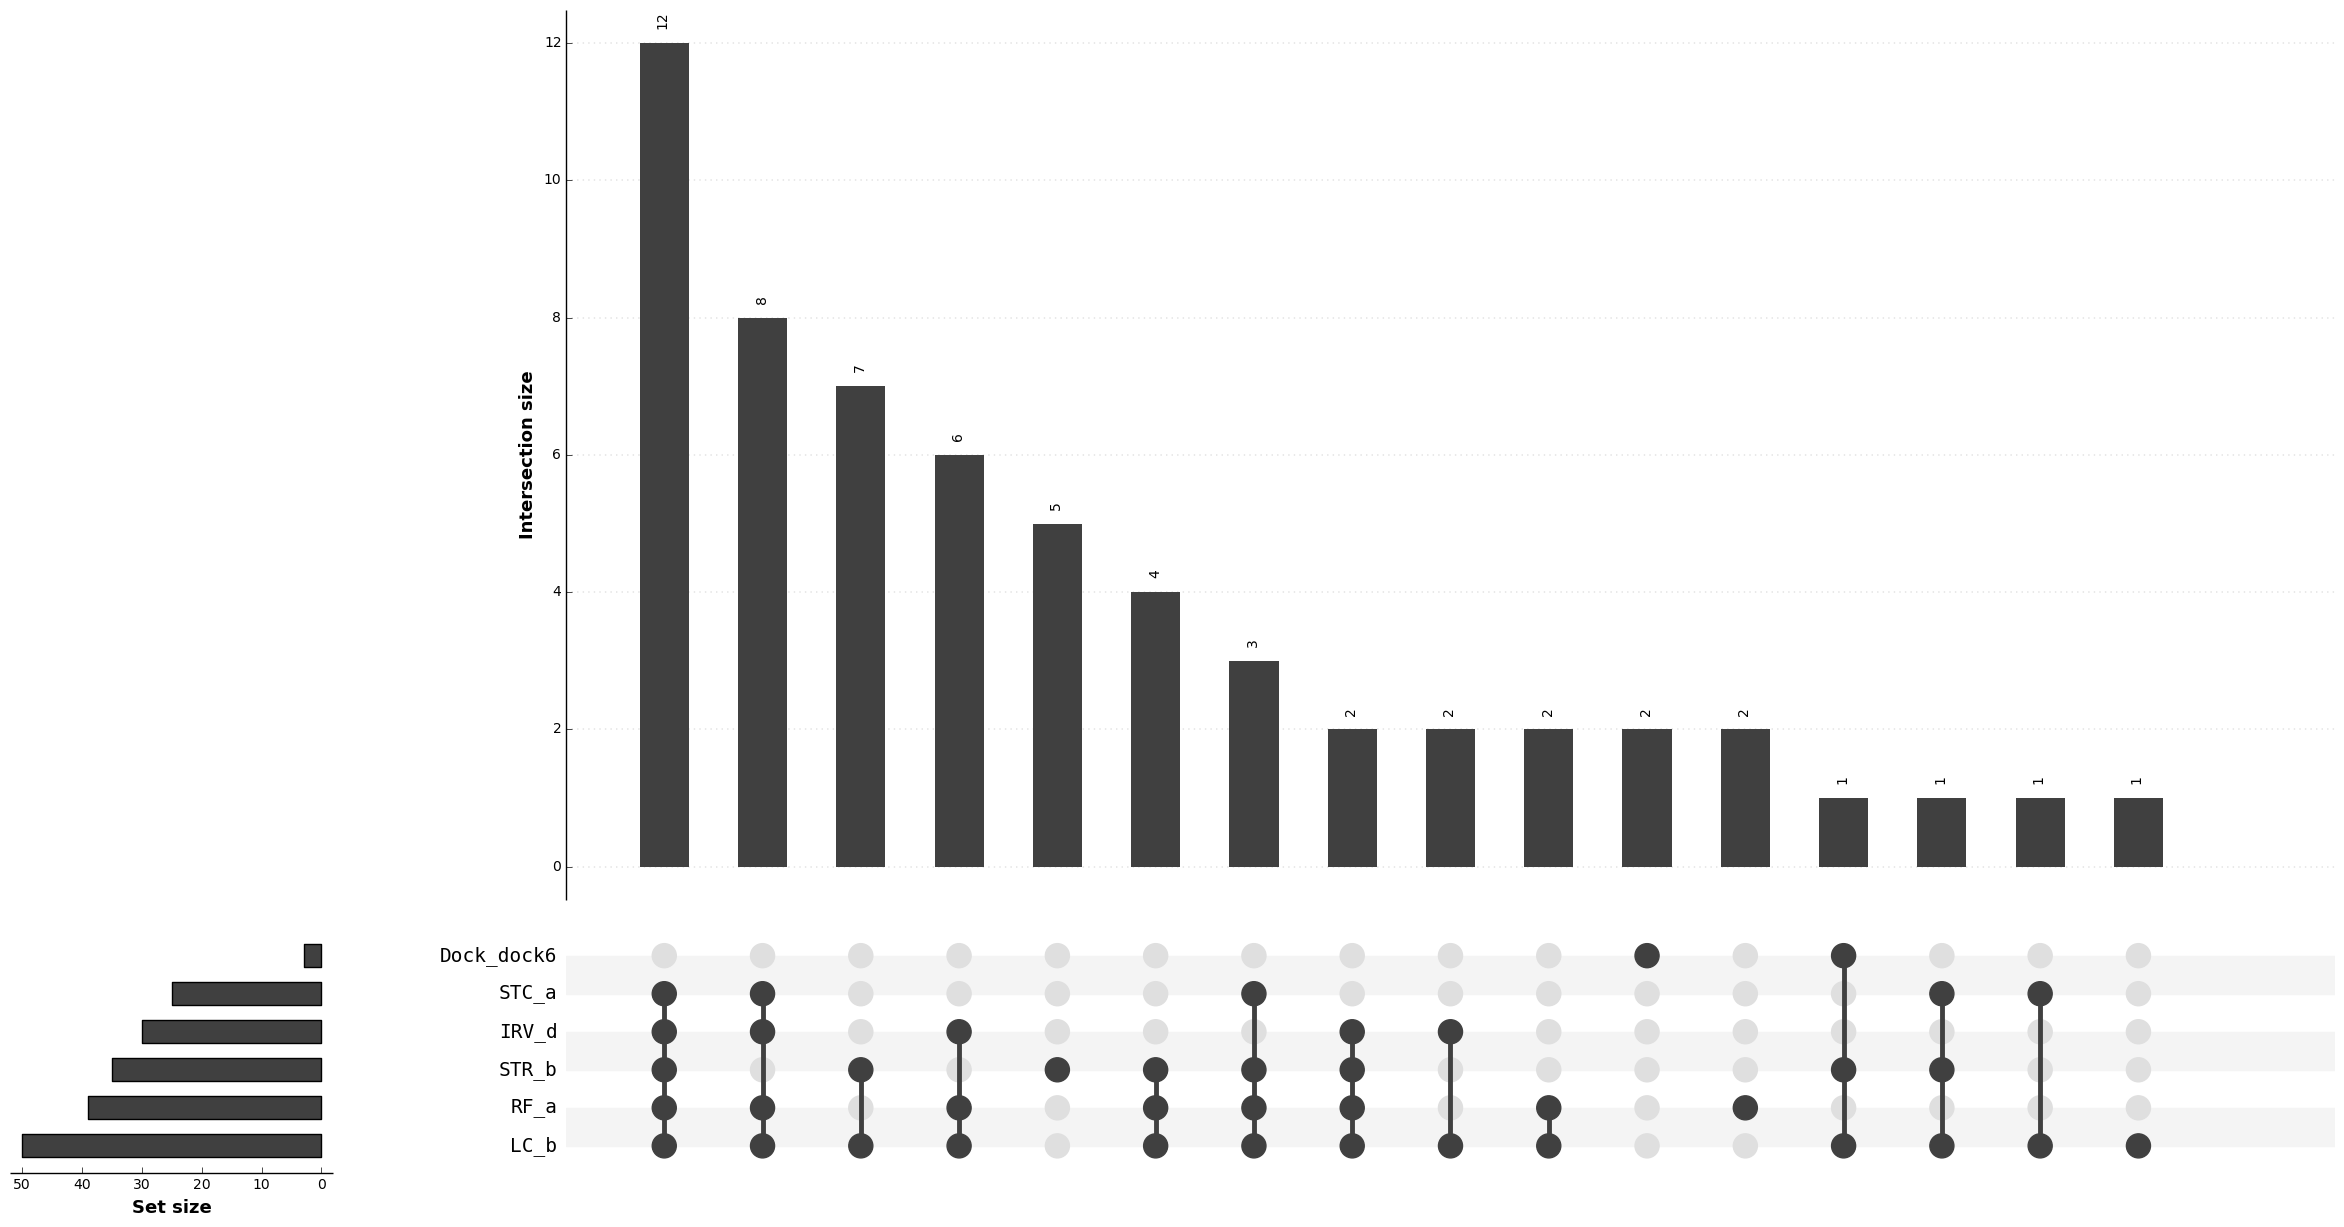

In [12]:
fig = pyu.plot(plot_dict, inters_size_bounds=(1, 100))

### Venn Diagram on IRV + RF

In [13]:
selected_names = ['IRV_a', 'IRV_b', 'IRV_c', 'IRV_d',
                  'RandomForest_a', 'RandomForest_b', 'RandomForest_c',
                  'RandomForest_d', 'RandomForest_e', 'RandomForest_f']

plot_dict = {}

for model_name in selected_names:
    positive_rank = rank_df[rank_df['label']>0][model_name]
    positive_rank = positive_rank.where(positive_rank<250)
    positive_rank = positive_rank.dropna()
    filtered_index = positive_rank.keys()
    filtered_df = pd.DataFrame(data=filtered_index, columns=['Items'])
    plot_dict[filter(model_name)] = filtered_df

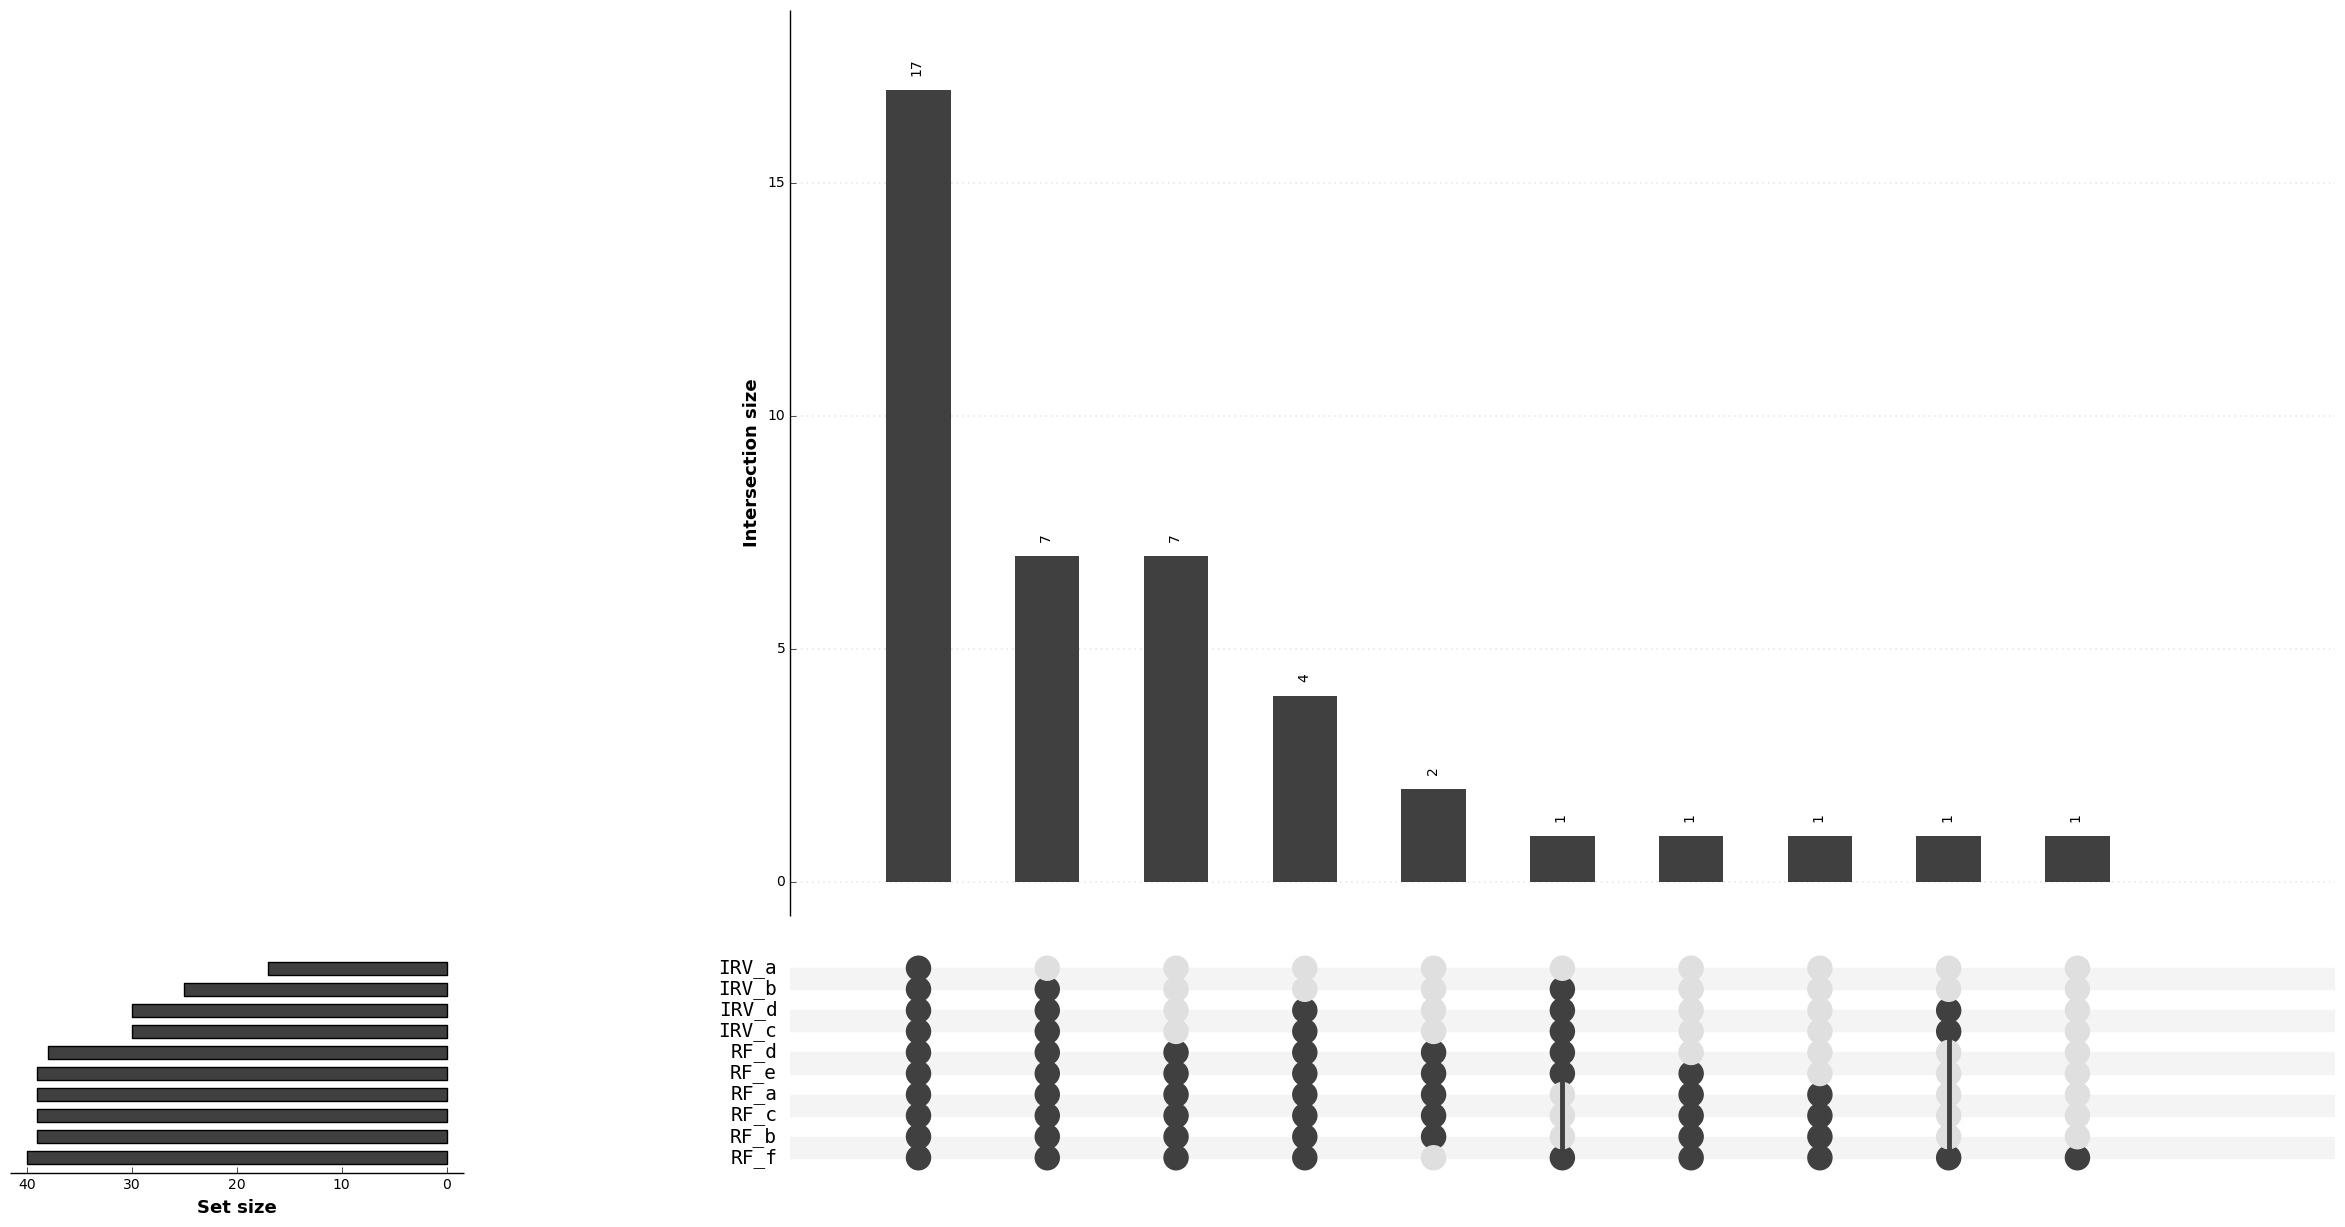

In [14]:
fig = pyu.plot(plot_dict, inters_size_bounds=(1, 100))

### Venn Diagram on Neural Networks

In [15]:
selected_names = ['SingleRegression_a', 'SingleRegression_b',
                  'SingleClassification_a', 'SingleClassification_b',
                  'MultiClassification_a', 'MultiClassification_b',
                  'LSTM_a', 'LSTM_b']

plot_dict = {}

for model_name in selected_names:
    positive_rank = rank_df[rank_df['label']>0][model_name]
    positive_rank = positive_rank.where(positive_rank<250)
    positive_rank = positive_rank.dropna()
    filtered_index = positive_rank.keys()
    filtered_df = pd.DataFrame(data=filtered_index, columns=['Items'])
    plot_dict[filter(model_name)] = filtered_df

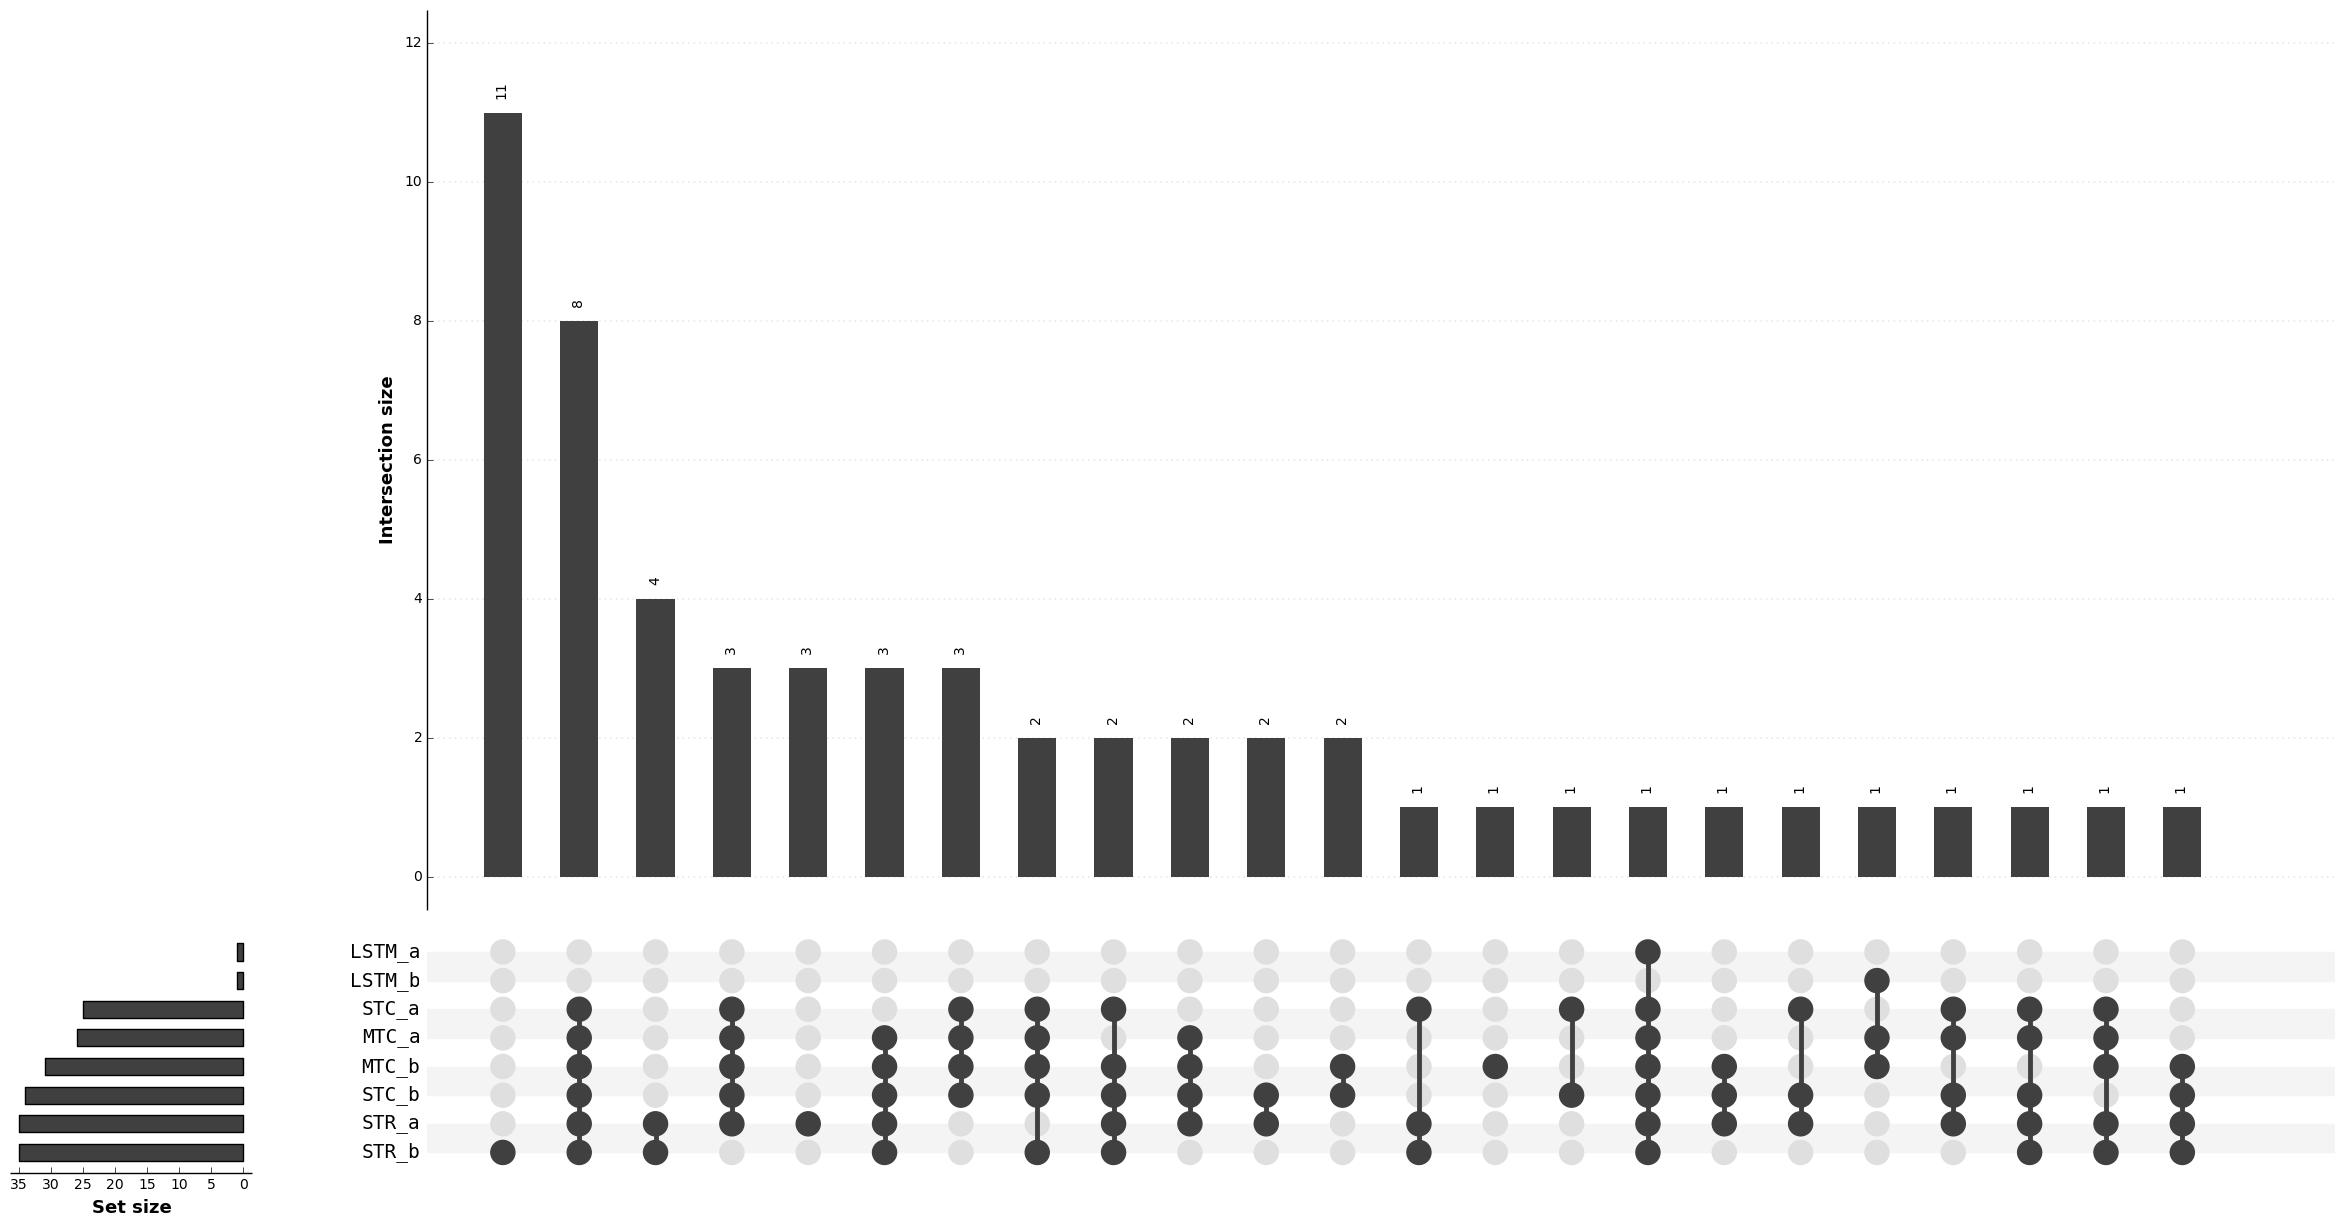

In [16]:
fig = pyu.plot(plot_dict, inters_size_bounds=(1, 100))

### Venn Diagram on LightChem + Docking

In [17]:
selected_names = ['LightChem_a', 'LightChem_b', 'LightChem_c',
                  'LightChem_d', 'LightChem_e']

plot_dict = {}

for model_name in selected_names:
    positive_rank = rank_df[rank_df['label']>0][model_name]
    positive_rank = positive_rank.where(positive_rank<250)
    positive_rank = positive_rank.dropna()
    filtered_index = positive_rank.keys()
    filtered_df = pd.DataFrame(data=filtered_index, columns=['Items'])
    plot_dict[filter(model_name)] = filtered_df

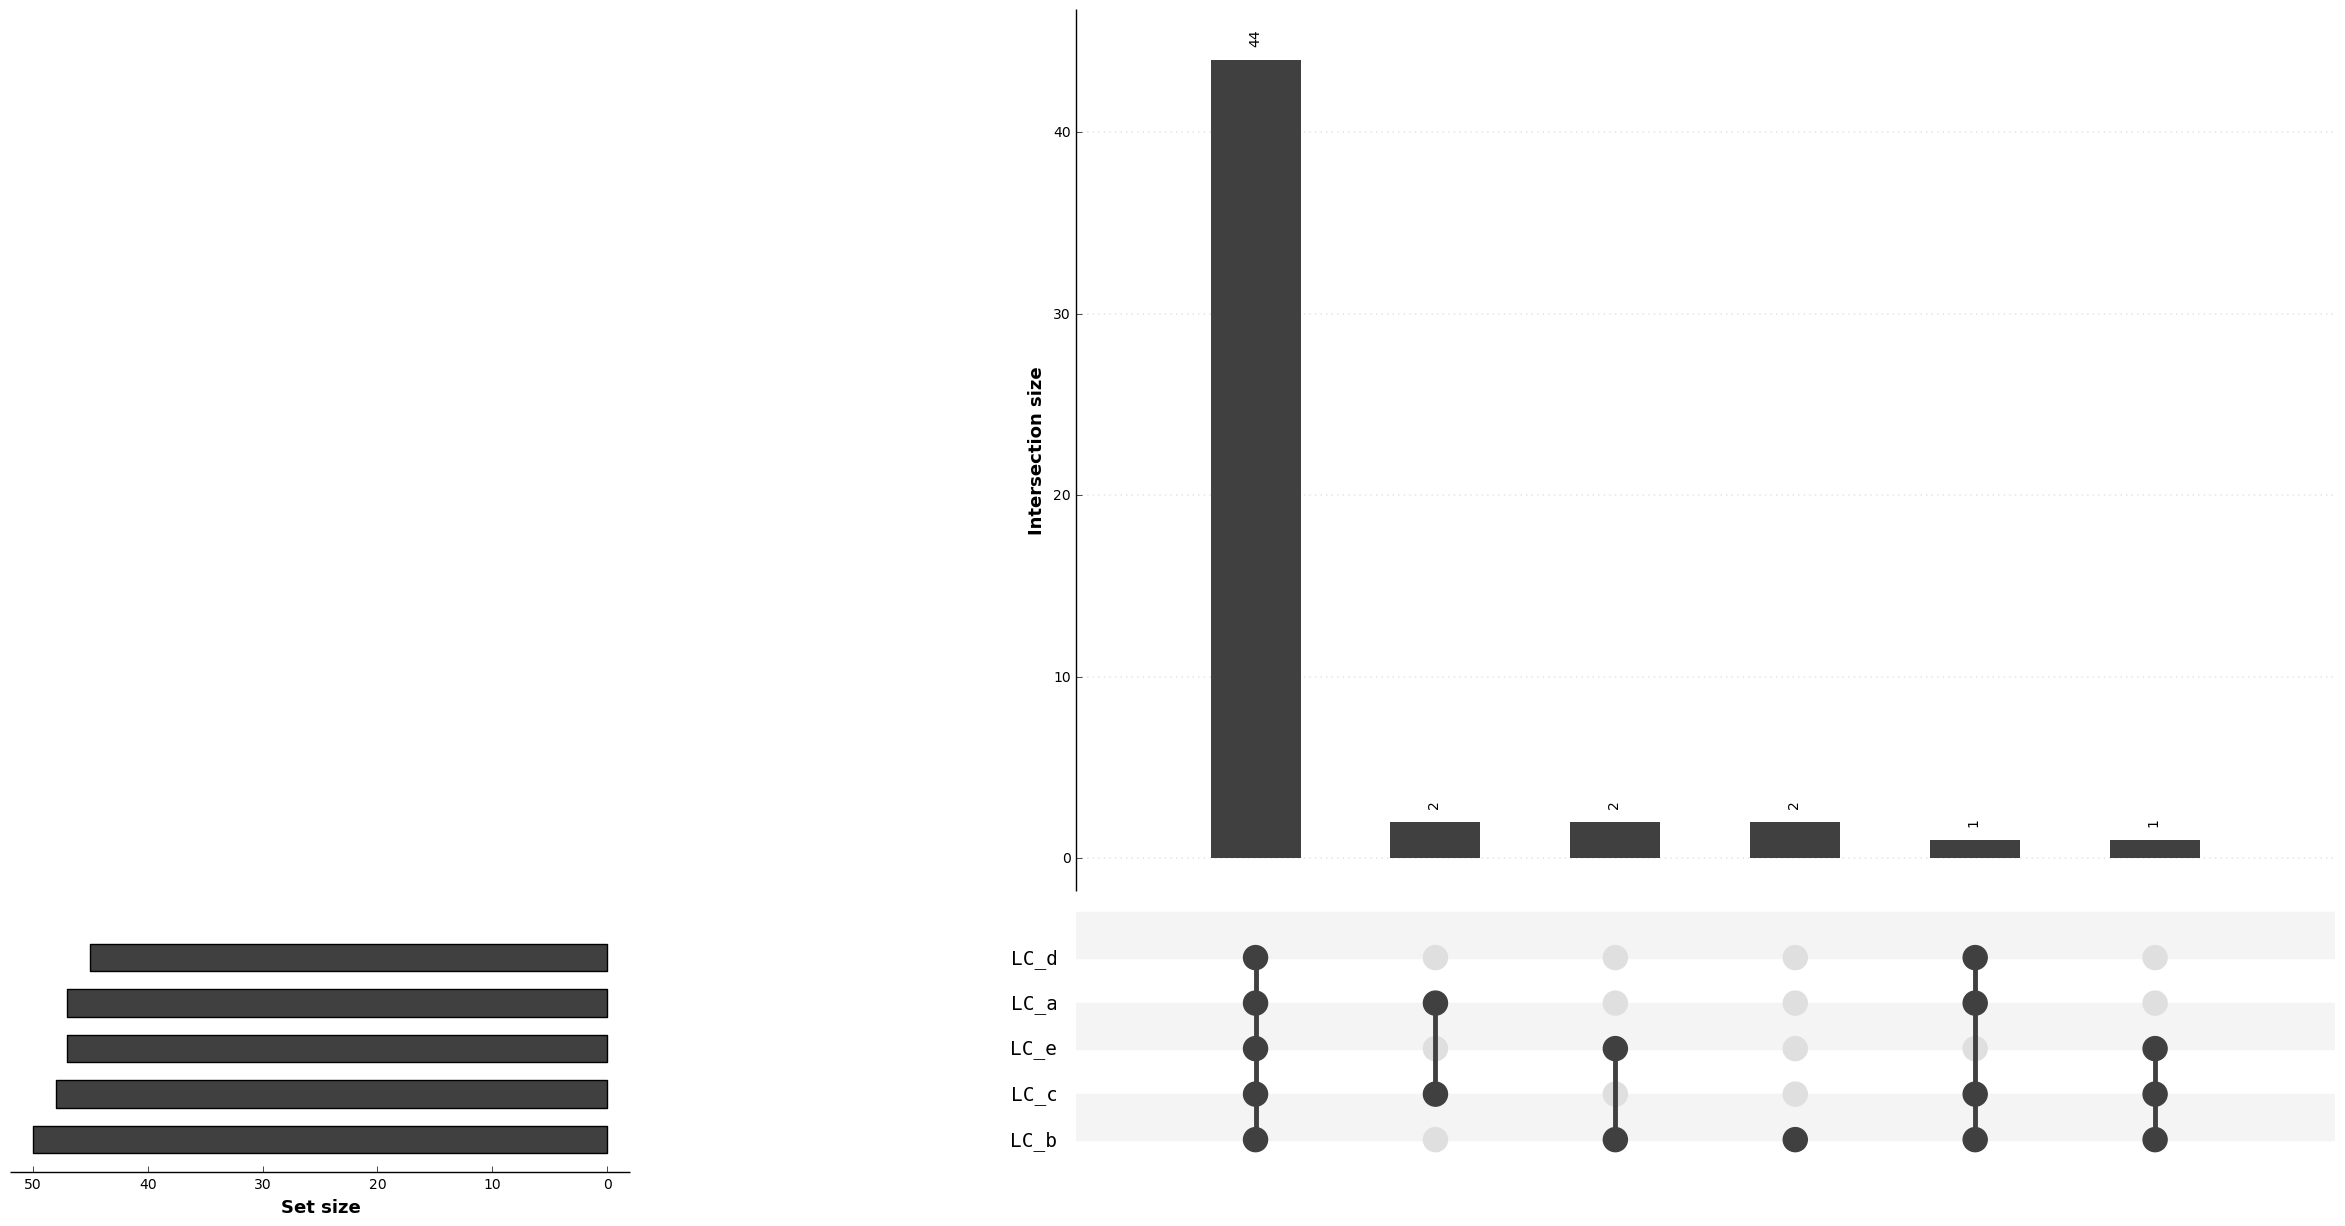

In [18]:
fig = pyu.plot(plot_dict, inters_size_bounds=(1, 100))

In [19]:
selected_names = ['ConsensusDocking_efr1_opt', 'ConsensusDocking_max', 'ConsensusDocking_mean', 
                  'ConsensusDocking_median', 'ConsensusDocking_rocauc_opt']

plot_dict = {}

for model_name in selected_names:
    positive_rank = rank_df[rank_df['label']>0][model_name]
    positive_rank = positive_rank.where(positive_rank<250)
    positive_rank = positive_rank.dropna()
    filtered_index = positive_rank.keys()
    filtered_df = pd.DataFrame(data=filtered_index, columns=['Items'])
    plot_dict[filter(model_name)] = filtered_df

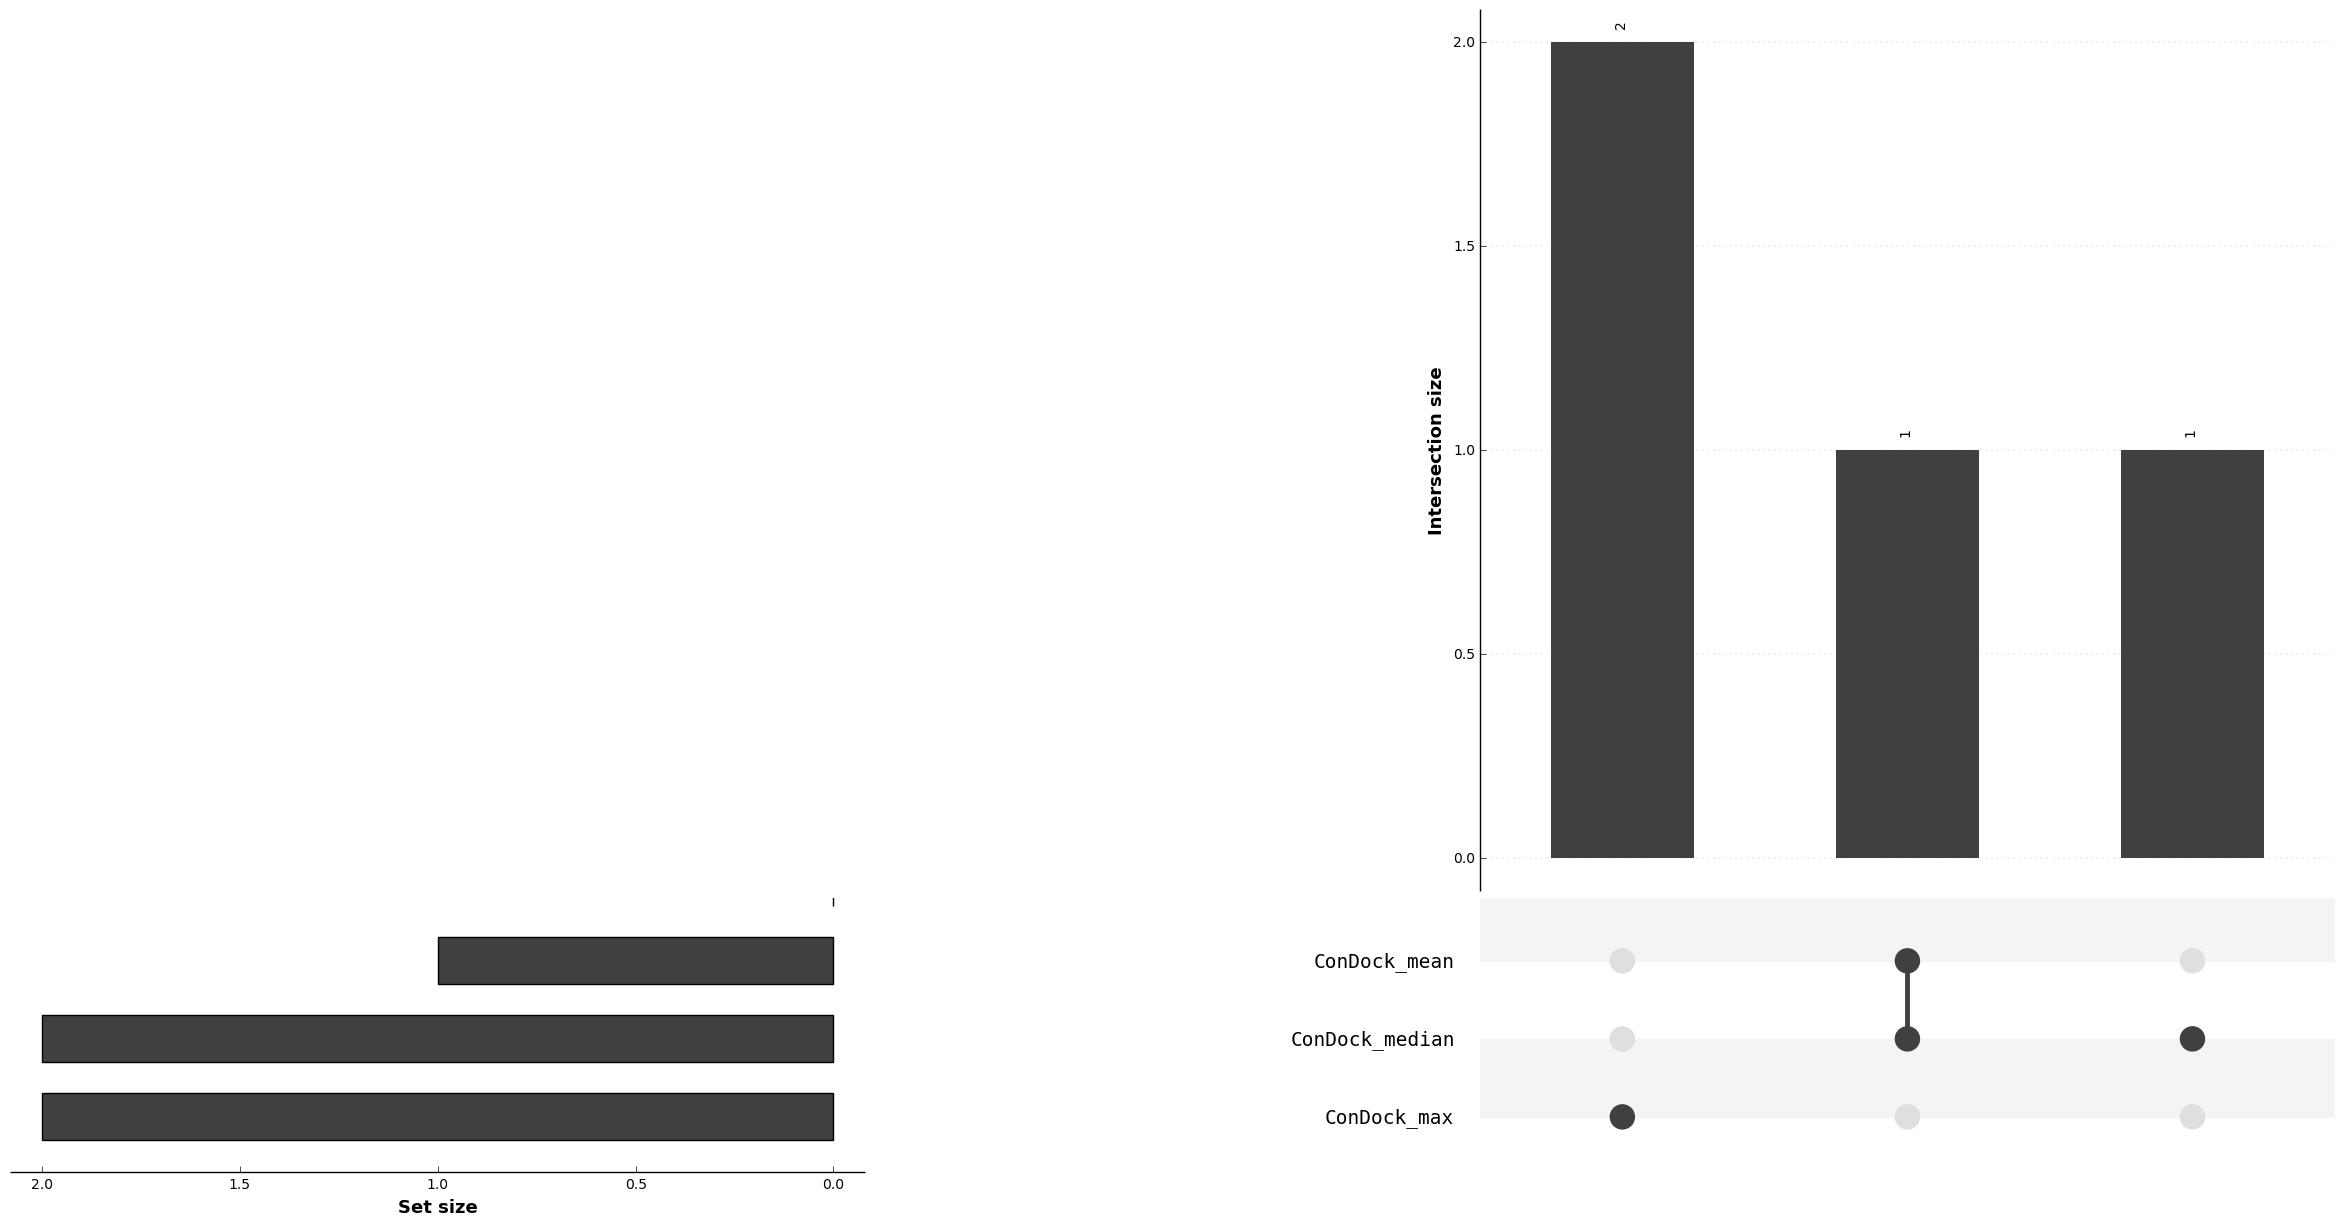

In [20]:
fig = pyu.plot(plot_dict, inters_size_bounds=(1, 100))

In [21]:
selected_names = ['Docking_ad4', 'Docking_dock6', 'Docking_fred', 'Docking_hybrid', 'Docking_plants', 
                  'Docking_rdockint', 'Docking_rdocktot', 'Docking_smina', 'Docking_surflex']

plot_dict = {}

for model_name in selected_names:
    positive_rank = rank_df[rank_df['label']>0][model_name]
    positive_rank = positive_rank.where(positive_rank<250)
    positive_rank = positive_rank.dropna()
    filtered_index = positive_rank.keys()
    filtered_df = pd.DataFrame(data=filtered_index, columns=['Items'])
    plot_dict[filter(model_name)] = filtered_df

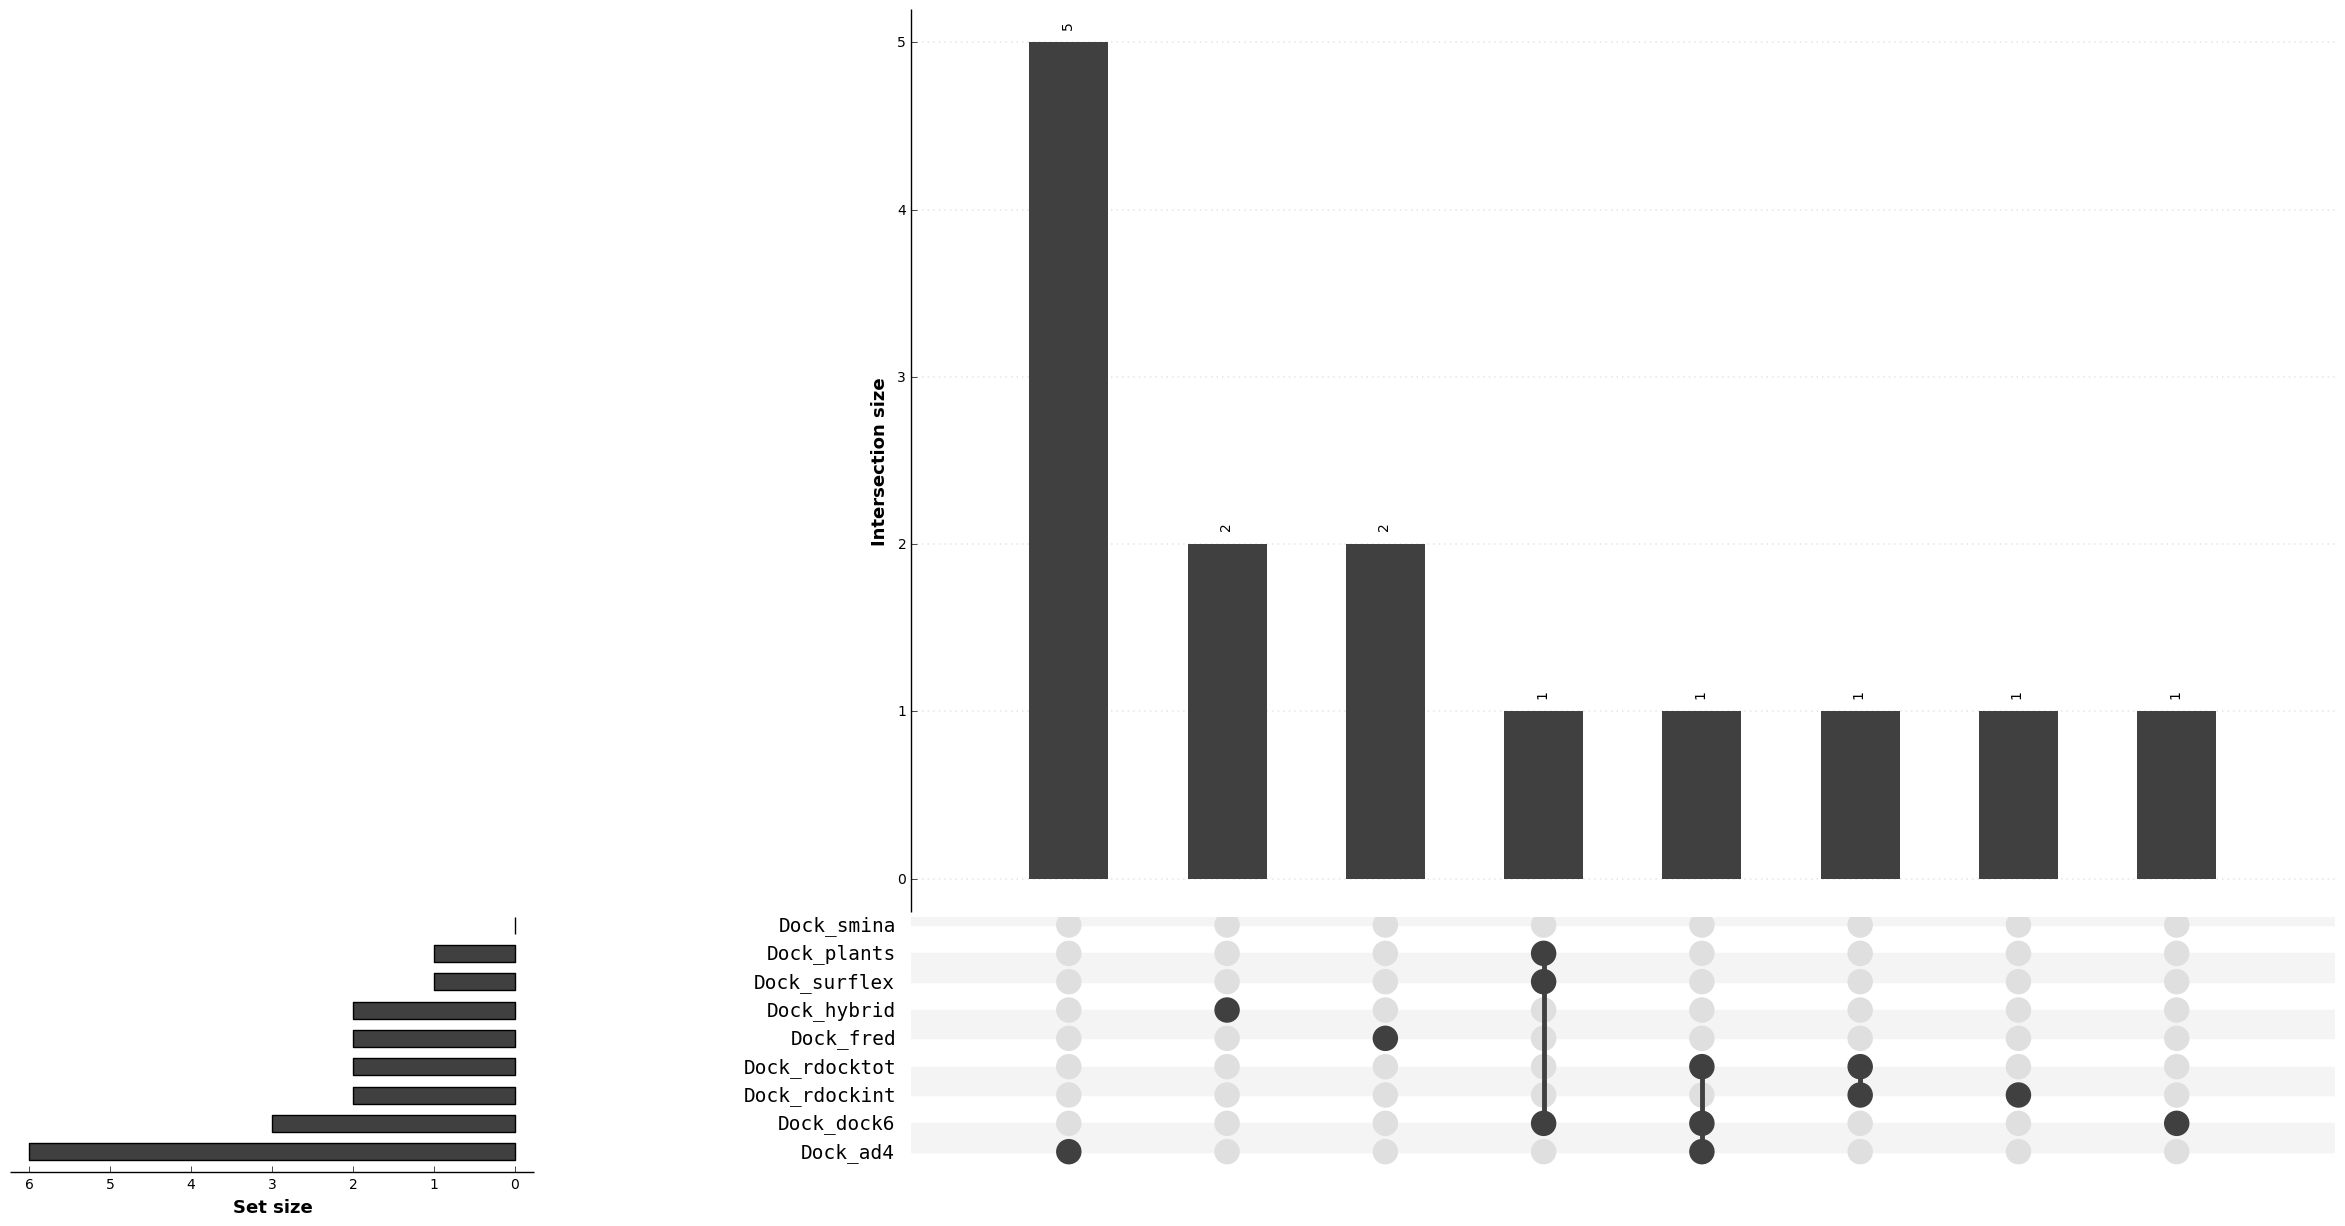

In [22]:
fig = pyu.plot(plot_dict, inters_size_bounds=(1, 100))